<a href="https://colab.research.google.com/github/ConorD28/Throw-Accuracy/blob/main/Giants_Questionnaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
data = pd.read_csv('SS Accuracy.csv')
data

,play_id,type,role_name,target_base,seconds_since_pitch_release,ball_x,ball_y,ball_z
0,A,ball_was_hit,hitter,NaN,0.466,0.130012,1.026029,0.770220
1,A,NaN,NaN,NaN,0.500,-0.469504,4.249655,0.976729
2,A,NaN,NaN,NaN,0.533,-0.928738,6.919573,2.102556
3,A,NaN,NaN,NaN,0.566,-1.386324,9.574058,3.181853
4,A,NaN,NaN,NaN,0.600,-1.856053,12.292840,4.245192
...,...,...,...,...,...,...,...,...
724,F,NaN,NaN,NaN,4.067,54.269622,75.806800,2.404944
725,F,NaN,NaN,NaN,4.100,56.468542,73.792980,1.867912
726,F,NaN,NaN,NaN,4.134,58.716213,71.725217,1.280656
727,F,NaN,NaN,NaN,4.167,NaN,NaN,NaN


*   61 feet is y dist. to back of pitcher's rubber from home so same for pitcher's mound to middle of first base (60.5 feet + .5 foot for rubber)
*   89.25 feet from home to middle of first base (90 feet - .75 feet for half of first base)

*   glove height of first baseman is probably about 4 feet off the ground
*   first baseman probably stretches about 4 feet to catch the throw
*   he probably stretches about 3 feet toward the mound and 1 foot to second base
*   arm and glove probably covers about 3 more feet
*   from arm and glove first baseman probably covers 2 feet to mound and 1 foot to second base
*   so coordinates of first baseman trying to catch ball where (0, 0, 0) is first base: (-5, 2, 4)









In [221]:
math.sqrt(89.25**2-61**2) #find x distance for home to first

65.1503069831601

In [222]:
#Distance = √((x2 – x1)^2 + (y2 – y1)^2 + (z2 – z1)^2)
def Accuracy(df):
  distances = []
  playID = []
  for i in range(len(df)):
    if df['type'][i] == 'ball_was_caught':
      dist = math.sqrt((df.ball_x[i]-60.1503069831601)**2 + (df.ball_y[i]-63)**2 + (df.ball_z[i]-4)**2) #how far away from where glove should be
      distances.append(round(dist,2)) #make list of distances of how far off throw is
      playID.append(df['play_id'][i])
  data_frame = pd.DataFrame({'PlayID': playID, 'How Far Off': distances})
  data_frame = data_frame.sort_values(by = 'How Far Off')
  data_frame = data_frame.reset_index(drop = True)
  return data_frame

In [223]:
data2 = data.drop('target_base', axis = 1)

In [224]:
data2[['ball_x', 'ball_y', 'ball_z']] = data2.groupby('play_id')[['ball_x', 'ball_y', 'ball_z']].apply(lambda group: group.ffill()).values
data2

,play_id,type,role_name,seconds_since_pitch_release,ball_x,ball_y,ball_z
0,A,ball_was_hit,hitter,0.466,0.130012,1.026029,0.770220
1,A,NaN,NaN,0.500,-0.469504,4.249655,0.976729
2,A,NaN,NaN,0.533,-0.928738,6.919573,2.102556
3,A,NaN,NaN,0.566,-1.386324,9.574058,3.181853
4,A,NaN,NaN,0.600,-1.856053,12.292840,4.245192
...,...,...,...,...,...,...,...
724,F,NaN,NaN,4.067,54.269622,75.806800,2.404944
725,F,NaN,NaN,4.100,56.468542,73.792980,1.867912
726,F,NaN,NaN,4.134,58.716213,71.725217,1.280656
727,F,NaN,NaN,4.167,58.716213,71.725217,1.280656


In [225]:
data2[data2['type']=='ball_was_caught']

,play_id,type,role_name,seconds_since_pitch_release,ball_x,ball_y,ball_z
122,A,ball_was_caught,first_baseman,4.533,61.826126,69.812454,1.316820
238,B,ball_was_caught,first_baseman,4.233,56.884427,61.848915,7.061968
367,C,ball_was_caught,first_baseman,4.700,59.909596,66.739112,5.881420
498,D,ball_was_caught,first_baseman,4.733,52.131858,62.904215,5.064771
613,E,ball_was_caught,first_baseman,4.200,58.521483,66.390697,2.974990
728,F,ball_was_caught,first_baseman,4.200,58.716213,71.725217,1.280656


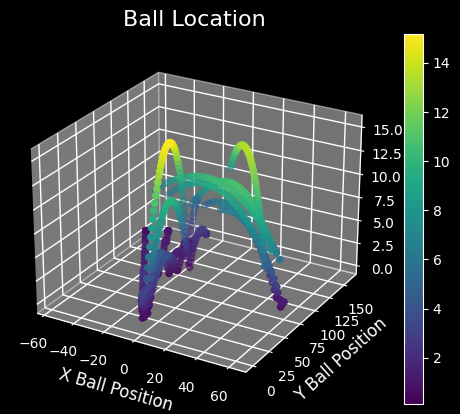

In [227]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data2.ball_x, data2.ball_y, data2.ball_z, c=data2.ball_z, cmap='viridis')

ax.set_xlabel('X Ball Position')
ax.set_ylabel('Y Ball Position')
ax.set_zlabel('Z Ball Position')
plt.title('Ball Location')

plt.colorbar(scatter)

plt.style.use('dark_background')
ax.view_init(elev=25)
plt.show()

In [228]:
throw_accuracies = Accuracy(data2)
throw_accuracies #sorted by most accurate

,PlayID,How Far Off
0,E,3.90
1,C,4.19
2,B,4.62
3,A,7.51
4,D,8.09
5,F,9.25


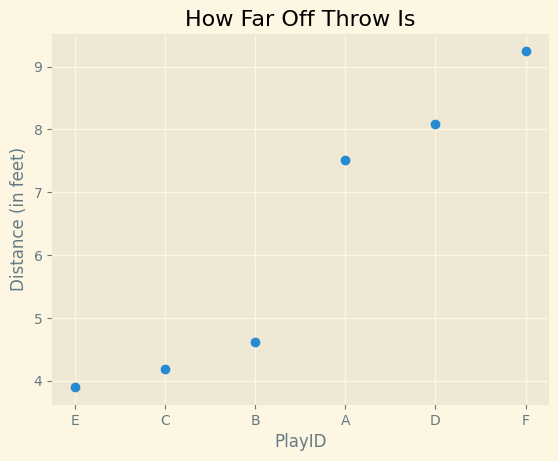

In [230]:
plt.scatter(throw_accuracies.PlayID, throw_accuracies['How Far Off'])
plt.xlabel("PlayID")
plt.ylabel("Distance (in feet)")
plt.title("How Far Off Throw Is", color = 'black')
plt.style.use('Solarize_Light2')
plt.show()

3. Most accurate to least accurate throws are E, C, B, A, D, and F. I would  scale this analysis up to create a single accuracy score by getting the average distance off from all throws. That value would be the accuracy score.